### Assignment
1. Load any other dataset (like the Iris dataset) and perform basic EDA, including handling missing values and visualizing relationships between features.

In [26]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the data 
iris = datasets.load_iris()
print(type(iris)) 


<class 'sklearn.utils._bunch.Bunch'>


Iris dataset loaded via sklearn.datasets is not a pandas DataFrame so they doesn't have .head() because it's not tabular data yet.

In [27]:
# Convert to data frame 
data = pd.DataFrame(iris.data, columns=iris.feature_names)

data['target'] = iris.target
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [28]:
# Identifying missing value 
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [29]:
# Optional: Add species names for better readability
data['species'] = data['target'].apply(lambda x: iris.target_names[x])

print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [30]:
# Check basic info
print("\n Dataset Info:")
print(data.info())

# Check basic statistics
print("\n Statistical Summary:")
print(data.describe())

# Check target distribution
print("\n Target Distribution:")
print(data['species'].value_counts())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None

 Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             

Visualizing Feature Relationships

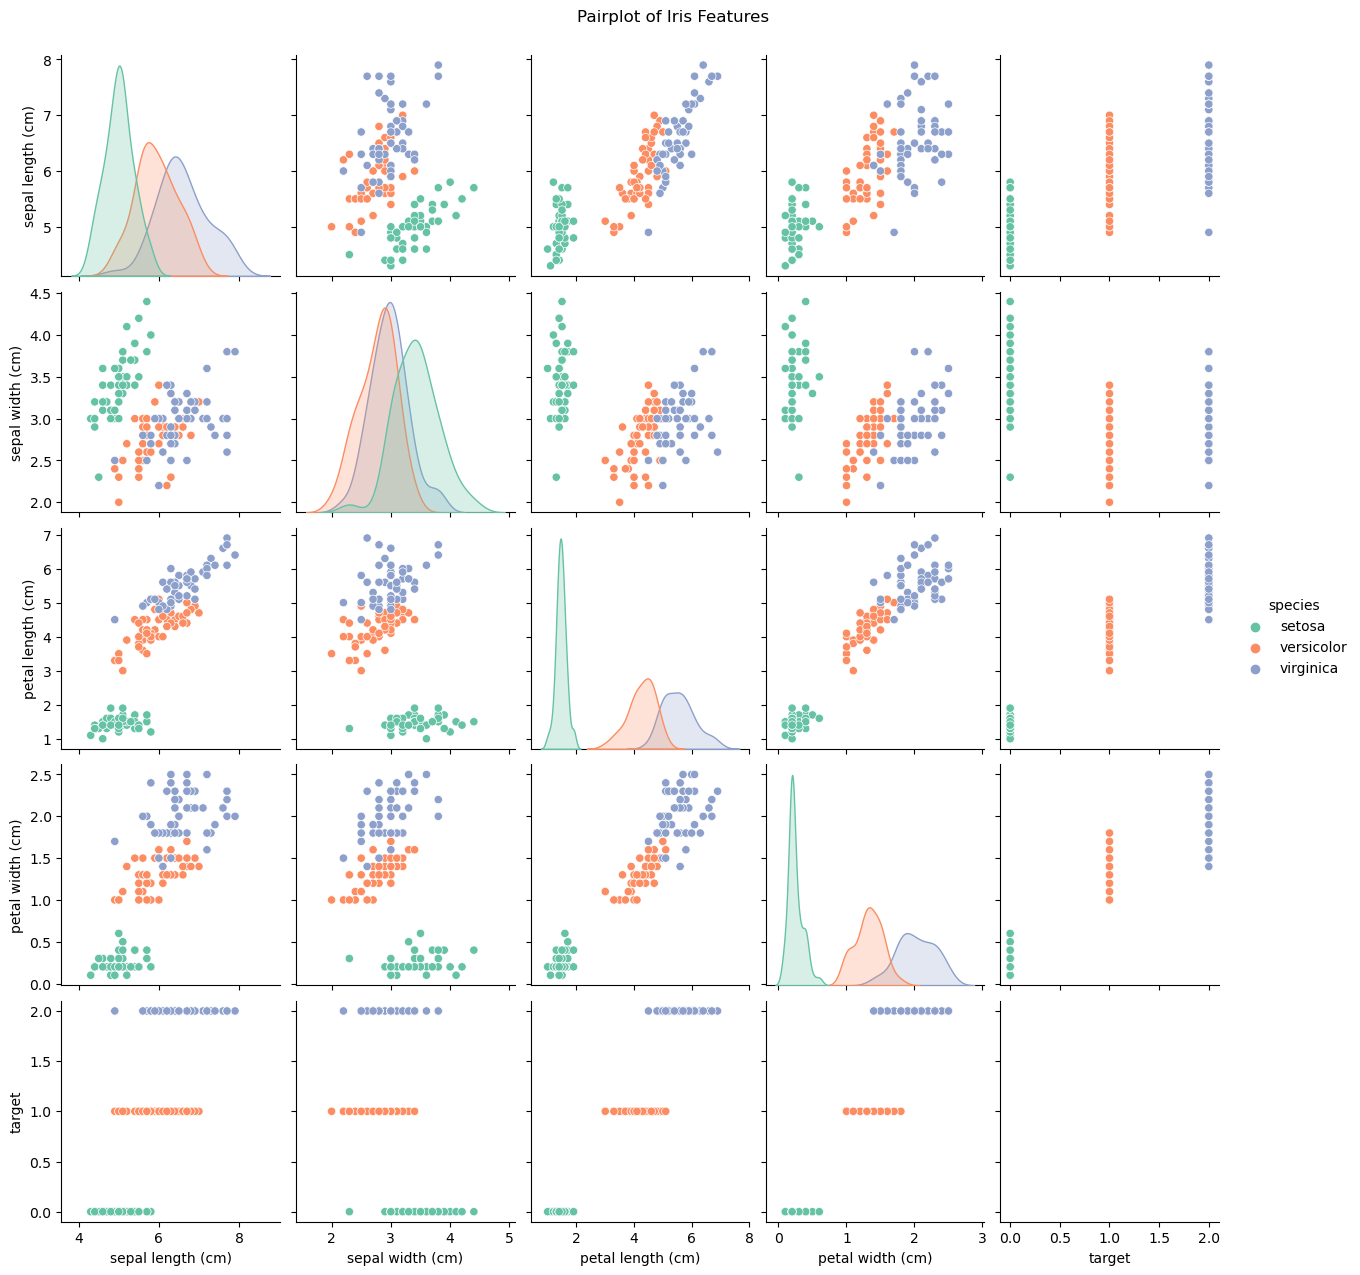

In [31]:
# Pairplot to show relationships and class distributions
sns.pairplot(data, hue='species', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

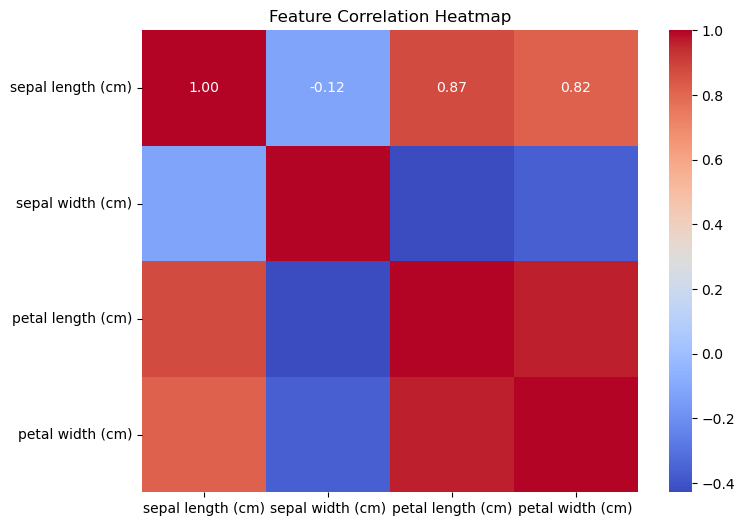

In [32]:
# Create correlation matrix
corr = data.iloc[:, :-2].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

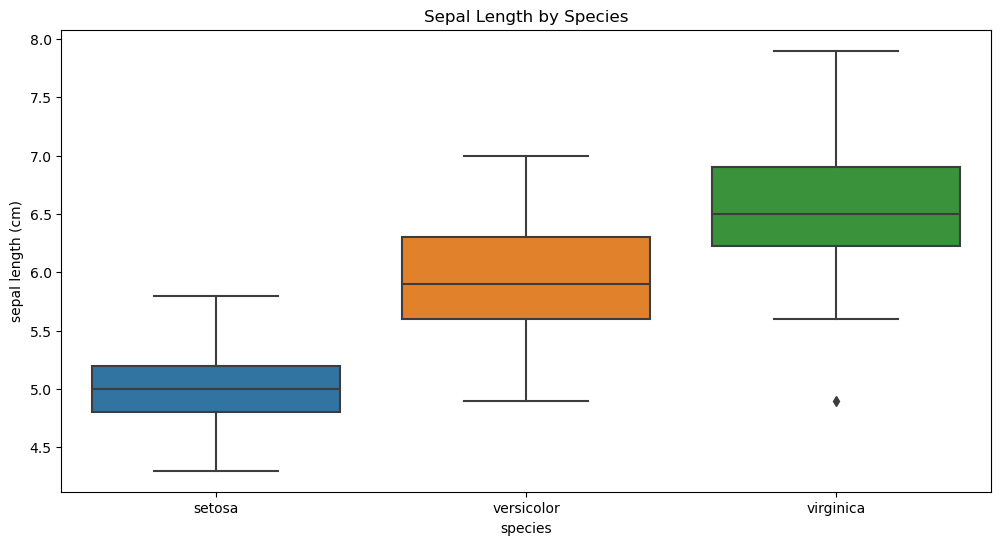

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.title("Sepal Length by Species")
plt.show()

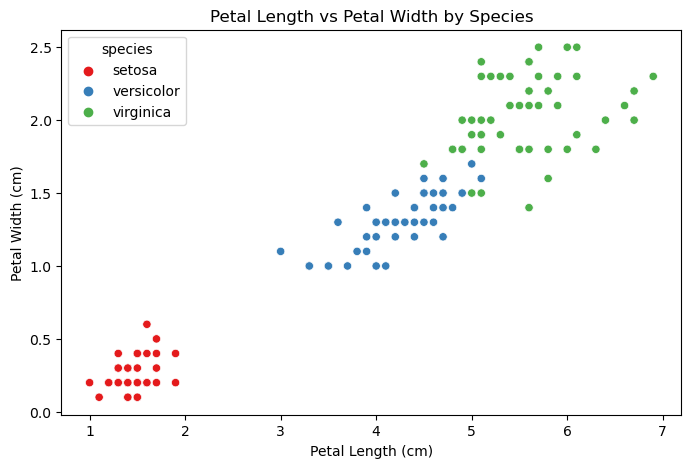

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=data, palette='Set1')
plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

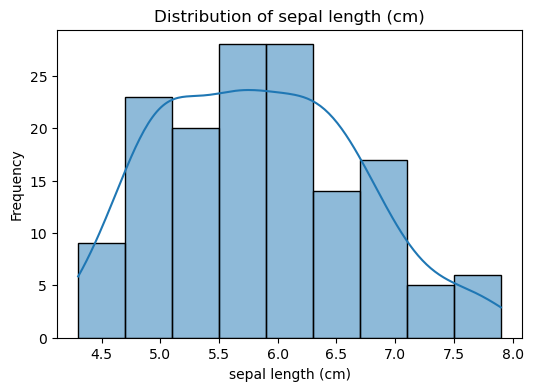

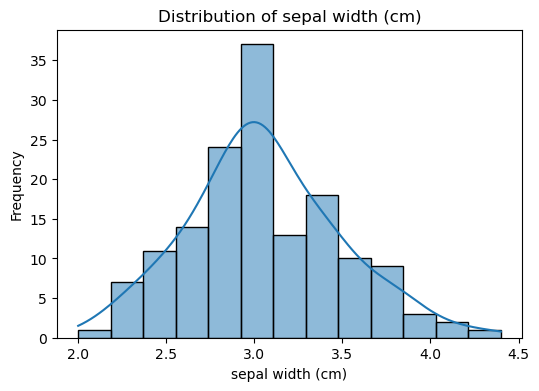

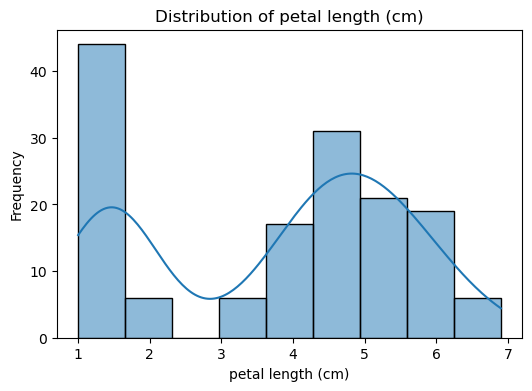

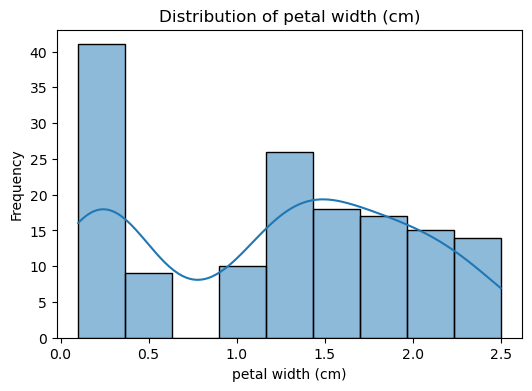

In [35]:
# Distribution of individual features
features = iris.feature_names
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()